In [1]:
using Pkg
Pkg.activate("../")

using StatsFuns
using Revise
using HiddenMarkovModel

Activating environment at `~/Skola/VTI/HiddenMarkovModel/Project.toml`


┌ Info: Precompiling HiddenMarkovModel [7212e43c-49b6-4278-a2e6-573e0ac5bb2d]
└ @ Base loading.jl:1273
┌ Warning: Replacing docs for `HiddenMarkovModel.pdfindex :: Union{}` in module `HiddenMarkovModel`
└ @ Base.Docs docs/Docs.jl:223


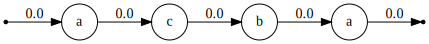

In [138]:
emissionsmap = Dict(
    "a" => 1,
    "b" => 2,
    "c" => 3,
    "d" => 4
)
sequence = ["a", "c", "b", "a"]
g1 = LinearGraph(sequence, emissionsmap)

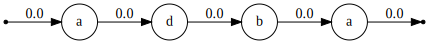

In [139]:
sequence = ["a", "d", "b", "a"]
g2 = LinearGraph(sequence, emissionsmap)

weightnormalize(g2)

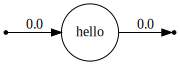

In [140]:
g3 = Graph()
s1 = addstate!(g3, State(1, 1, "hello"))
link!(initstate(g3), s1)
link!(s1, finalstate(g3))
g3

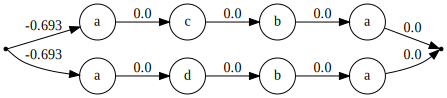

In [145]:
g = union(g1, g2)

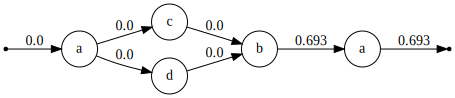

In [146]:
g |> minimize

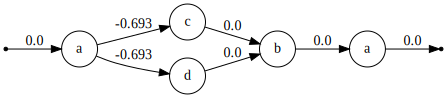

In [147]:
g = g |> minimize |> determinize |> weightnormalize

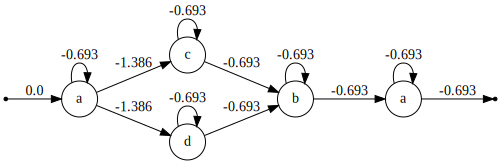

In [148]:
g = addselfloop(g) |> weightnormalize

In [ ]:
for (sid, state) in g.states
    println("state $(state) : $(state.incoming)")
    println("---")
end

In [88]:
D,N = 4,7 # number of distributions times number of frames
llh = randn(D, N)

4×7 Array{Float64,2}:
  1.35043    0.791617  1.12574    2.45514    1.34996   -0.372545  -1.5387  
 -0.187235  -0.428797  1.1113     0.738995   0.562467  -0.177292   0.753449
 -0.63287    1.23144   1.11597   -1.45338    0.703874  -0.529957  -2.51284 
  0.472358  -0.406656  0.350302  -1.91761   -1.99387    2.18641    0.79865 

In [89]:
α = αrecursion(g, llh; pruning=nopruning) # the lower the more pruning 
α

7-element Array{Dict{State,Float64},1}:
 Dict(State(id = 8, pdfindex = 1, a) => 1.3504284099071648)                                                                                                                                                                                                                   
 Dict(State(id = 6, pdfindex = 4, d) => -0.442521478408123,State(id = 2, pdfindex = 3, c) => 1.1955749591489984,State(id = 8, pdfindex = 1, a) => 1.4488985503590155)                                                                                                         
 Dict(State(id = 6, pdfindex = 4, d) => 0.7693792777154373,State(id = 2, pdfindex = 3, c) => 2.9258348177544393,State(id = 7, pdfindex = 2, b) => 2.077768010090475,State(id = 8, pdfindex = 1, a) => 1.8814884313337987)                                                     
 Dict(State(id = 5, pdfindex = 1, a) => 3.83975851692084,State(id = 6, pdfindex = 4, d) => -1.3301463461853555,State(id = 2, pdfindex = 3, c) => -0

In [90]:
β = βrecursion(g, llh; pruning=nopruning) # the lower the more pruning 
β

7-element Array{Dict{State,Float64},1}:
 Dict(State(id = 5, pdfindex = 1, a) => -1.0408243134979167,State(id = 6, pdfindex = 4, d) => -0.9030510771544767,State(id = 2, pdfindex = 3, c) => 0.176814378765159,State(id = 7, pdfindex = 2, b) => -0.5155146846969946,State(id = 8, pdfindex = 1, a) => -0.24472977007875196)  
 Dict(State(id = 5, pdfindex = 1, a) => -1.1392944539497678,State(id = 6, pdfindex = 4, d) => -0.7246780924908562,State(id = 2, pdfindex = 3, c) => -0.5902400314299295,State(id = 7, pdfindex = 2, b) => -0.28852120238205814,State(id = 8, pdfindex = 1, a) => -1.5787435033808221)
 Dict(State(id = 5, pdfindex = 1, a) => -1.571884334924551,State(id = 6, pdfindex = 4, d) => -2.55477477004813,State(id = 2, pdfindex = 3, c) => -2.5033216910069993,State(id = 7, pdfindex = 2, b) => -1.2636881120017416,State(id = 8, pdfindex = 1, a) => -2.5848355820617157)    
 Dict(State(id = 5, pdfindex = 1, a) => -3.333874841754916,State(id = 6, pdfindex = 4, d) => -3.2841444300294618,State(id = 2,

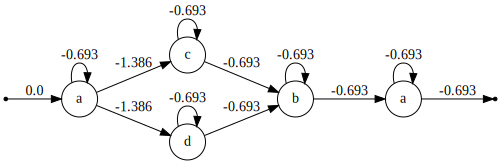

In [91]:
g

In [102]:
lnαβ = αβrecursion(g, llh) # the lower the more pruning 
exp.(lnαβ)

4×7 Array{Float64,2}:
 1.0  0.290677  0.111331   0.330551    0.757971    0.807795  1.0
 0.0  0.0       0.507721   0.659743    0.197076    0.192205  0.0
 0.0  0.60631   0.343218   0.00816227  0.0423418   0.0       0.0
 0.0  0.103013  0.0377301  0.00154371  0.00261074  0.0       0.0

In [87]:
emissionsmap

Dict{String,Int64} with 4 entries:
  "c" => 3
  "b" => 2
  "a" => 1
  "d" => 4

State[State(id = 5, pdfindex = 1, a)]
[1.1327625579395013]
-----
State[State(id = 5, pdfindex = 1, a), State(id = 7, pdfindex = 2, b)]
[1.9255128872028209, 0.4897672303691385]
-----
State[State(id = 5, pdfindex = 1, a), State(id = 7, pdfindex = 2, b)]
[2.1407757558009837, -0.0018121015525438544]
-----
State[State(id = 5, pdfindex = 1, a), State(id = 7, pdfindex = 2, b)]
[0.5058836751659239, 0.7461954409583829]
-----
State[State(id = 6, pdfindex = 4, d), State(id = 2, pdfindex = 3, c), State(id = 7, pdfindex = 2, b)]
[-2.51864729841349, -0.36219175837448825, -1.2102585660384526]
-----
State[State(id = 2, pdfindex = 3, c), State(id = 8, pdfindex = 1, a)]
[-1.6696274114813094, -2.1094510008312373]
-----
State[State(id = 2, pdfindex = 3, c), State(id = 8, pdfindex = 1, a)]
[-Inf, -1.6696274114813099]
-----


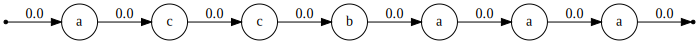

In [106]:
path = viterbi(g, llh)

In [158]:
import Pkg

In [159]:
Pkg.dir("Distributions")

┌ Warning: `Pkg.dir(pkgname, paths...)` is deprecated; instead, do `import Distributions; joinpath(dirname(pathof(Distributions)), "..", paths...)`.
└ @ Pkg.API /Users/julia/buildbot/worker/package_macos64/build/usr/share/julia/stdlib/v1.3/Pkg/src/API.jl:673


"/Users/praca/.julia/packages/Distributions/uFI1h/"